In [203]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm

# Solver Functions

In [204]:
def solve_mass_spring_damper(t_max, dt, position_ic, velocity_ic, external_force):
    # Time array
    t_values = np.arange(0, t_max, dt)
    
    # Arrays to store solutions
    x_values = np.zeros_like(t_values)
    v_values = np.zeros_like(t_values)
    
    # Set initial conditions
    x_values[0] = position_ic
    v_values[0] = velocity_ic
    
    # Iterative solution using Euler's method
    for i in range(1, len(t_values)):
        # Second derivative (acceleration)
        a = external_force - v_values[i-1] - 2 * x_values[i-1]
        
        # Update velocity
        v_values[i] = v_values[i-1] + a * dt
        
        # Update position
        x_values[i] = x_values[i-1] + v_values[i] * dt
    
    df = pd.DataFrame({'time': t_values, 'position': x_values, 'velocity': v_values})

    return df

# Generate Plots

In [205]:
def make_plots(positions_ic, velocities_ic, external_forces):
    
    fig, axes = plt.subplots(5, 2, figsize=(10, 30))

    def get_color_map(n, cmap_name='viridis'):
            """Generates a color function that maps integers 0 through n-1 to a color in the specified colormap."""
            cmap = cm.get_cmap(cmap_name + '_r')
            norm = plt.Normalize(0, n-1)
            scalar_map = cm.ScalarMappable(norm=norm, cmap=cmap)
            return scalar_map.to_rgba


    # Define plot positions
    plot_num_horizontal = 0
    plot_num_vertical = 0
    
    unique_velocities = sorted(velocities_ic)
    color_map = get_color_map(len(unique_velocities))
    velocity_color = {vel: color_map(i) for i, vel in enumerate(unique_velocities)}


    for external_force in external_forces:
        plot_num_horizontal = 0
        for position_ic in positions_ic:
            for velocity_ic in velocities_ic:
                solution_df = solve_mass_spring_damper(t_max=10,
                                                       dt=0.001,
                                                       position_ic=position_ic,
                                                       velocity_ic=velocity_ic,
                                                       external_force=external_force)

                color = velocity_color[velocity_ic]

                axes[plot_num_horizontal, plot_num_vertical].plot(solution_df['time'],
                                                                  solution_df['position'],
                                                                  color=color,
                                                                  label=velocity_ic)
                axes[plot_num_horizontal, plot_num_vertical].set_xlabel("Time (s)")
                axes[plot_num_horizontal, plot_num_vertical].set_ylabel("Position")
                axes[plot_num_horizontal, plot_num_vertical].set_title('Position IC: ' + str(position_ic) + ', External Force: ' + str(external_force))
                axes[plot_num_horizontal, plot_num_vertical].set_ylim([-3, 5])
                axes[plot_num_horizontal, plot_num_vertical].legend(loc='lower right', title='Velocity IC')
                axes[plot_num_horizontal, plot_num_vertical].grid(True, linestyle='-', color='lightgray', linewidth=0.5)
                
                # axes[plot_num_vertical, plot_num_horizontal].title("Position_ic=" + str(position_ic) + ', Velocity_ic: ' + str(velocity_ic) + ', External_force: ' + str(external_force))
            plot_num_horizontal = plot_num_horizontal + 1
        plot_num_vertical = plot_num_vertical + 1



    
    
    # plt.legend()
    # axes[0, 0].grid()

    plt.tight_layout()

    plt.show()

# Loop through ICs

C:\Users\vd662f\AppData\Local\Temp\ipykernel_21832\3584566657.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_name + '_r')


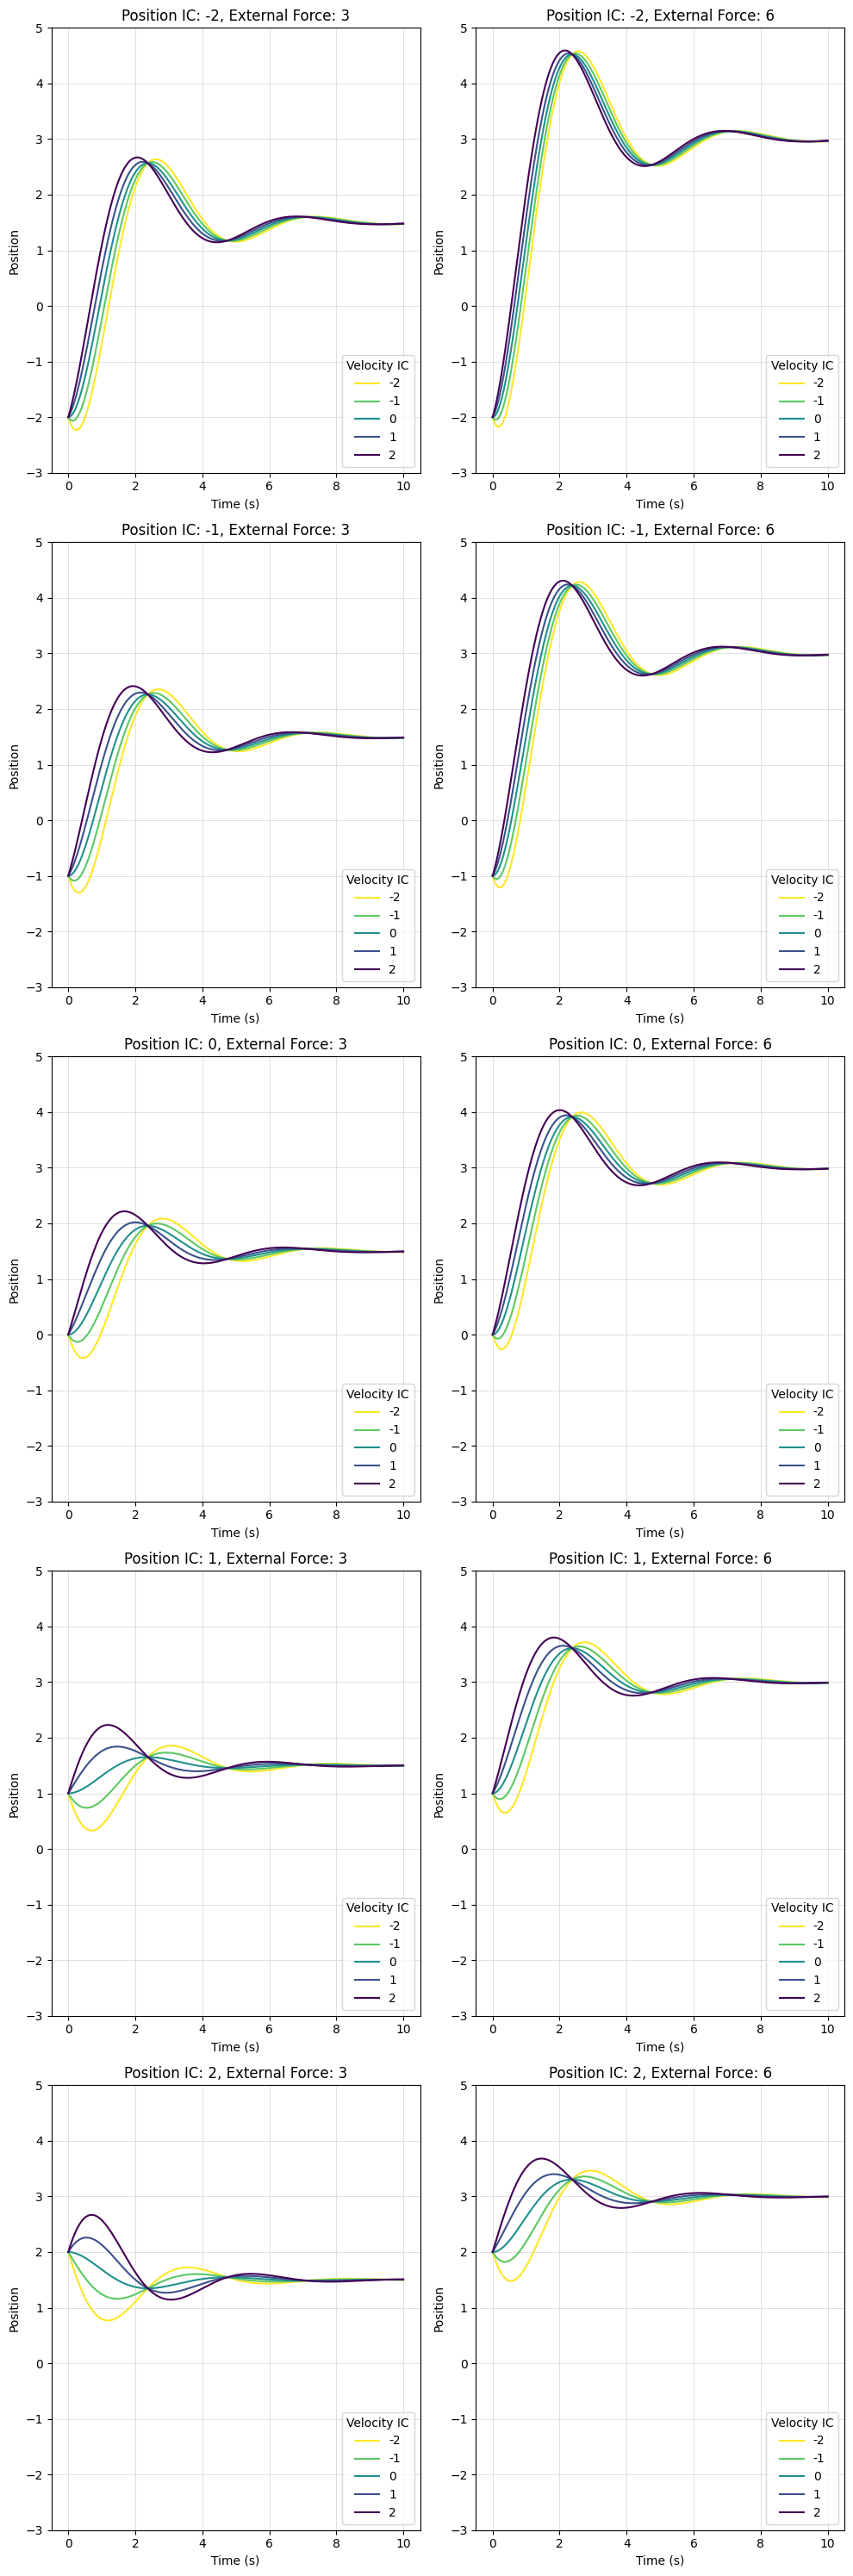

In [206]:
positions_ic = np.arange(-2, 3, 1)
velocities_ic = np.arange(-2, 3, 1)
external_forces = [3, 6]

make_plots(positions_ic=positions_ic,
           velocities_ic=velocities_ic,
           external_forces=external_forces)